# Lead Scorring Case Study
by Vladimir Nikonov

### Solution Strategy

1. Business problem understanding.
2. Mapping a business problem to a data science / machine learning problem.
3. Data sourcing, EDA, pre-processing.
4. Model building.
5. Model evaluation.

## 1. Business Problem Understanding

An education company called *X Education* provides online courses to industry professionals. 


The main source of revenue for the company is the customers buying their courses.


They advertise their products through different media. The customers go to their web-site, get acquainted with the courses, fill up a contact form. After a customer goes through this process, they are considered a lead.


The typical lead conversion rate at *X Education* is **30%**.


*X Education* requires a machine learning model, that will calculate the lead score. The leads with a higher conversion chance will get higher scores, while the leads with lower conversion chance will get lower score. The CEO has given a ballpark of the target lead conversion rate to be around **80%**.

## 2. Problem Mapping

* Customer: 
    * *X Education*'s sales team. They communicate with the leads, the model can help them identify the leads that they need to focus on communicating with.


* Expected ML solution:
    * A Logistic Regression Model.
    * The model computes the lead score, which is basically the probability of conversion.


* Data source:
    * Leads dataset from the past.

## 3. Data Sourcing, EDA, Pre-processing

### Reading and Understanding the Data

In [1]:
# Importing the necessary libraries.

import warnings
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Reading the data set and displaying the head of the data frame.

leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Displaying all the columns of the df.

pd.set_option('display.max_columns', False)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# The shape of the df.

leads.shape

(9240, 37)

In [5]:
# Information about the data types, missing values, etc.

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# Statistical summary.

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Cleaning

Some categorical columns contain the value `Select`, which is as good as `NaN`, as it indicates that the user didn't choose any of the options in the drop-down menu of a question.

Therefore, we can replace the `Select` with a `NaN`.

In [7]:
# Replacing Select values with NaN.

leads = leads.replace('Select', np.nan)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
# Checking the percentage of missing values by columns.

round(100*(leads.isnull().sum())/leads.shape[0], 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

Some of the columns have a large amount of missing values.

In [9]:
# Checking for the duplicates.

leads.loc[leads.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


No duplicates were found.

Let us assign a threshold of 40% for the missing values. If there is so much data lost in a column, it is of no use to us and, therefore, can be dropped.

In [10]:
# Getting the names of the columns with more than 40% of the data missing.

nan_cols = leads.columns[round((leads.isnull().sum()*100)/leads.shape[0]) >= 40]
nan_cols

Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

In [11]:
# Dropping the columns with more than 40% of the data missing.

leads = leads.drop(nan_cols, axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [12]:
# Checking the columns with missing values again.

round(100*(leads.isnull().sum())/leads.shape[0], 2).sort_values(ascending=False)

Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
X Education Forums                                0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect I

After looking at the data dictioonary, it is clear that values in certain columns get obtained from the sales representative of *X Education*, and not from the users. These columns are 'Lead Quality', 'Lead Profile' and 'Tags'. 'Lead Quality' and 'Lead Profile' columns have already been removed, we can now remove the column 'Tags' as well.

In [13]:
# Removing 'Tags' column.

leads = leads.drop('Tags', axis=1)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


#### Categorical Variables

In order to impute the missing values in categorical cariables, we need to check the most commonly occuring value column. Let us do that.

In [14]:
# Checking the value counts for 'Specialization' column.

leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

Although 'Finance Management' is the most occurring value in 'Specialization' column, the difference between this value and the second and the third most common values is not that big. Therefore, I think it will be wrong to assume that 36% of the leads with missing values in that column chose that exact specialization. We can create a new value in this column for the people who might not have decided on the specialization yet. Let it be the value 'Unknown'.

In [15]:
# Filling the missing values in 'Specialization' column with 'Unknown'.

leads['Specialization'].fillna('Unknown', inplace=True)
leads['Specialization'].value_counts()

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [16]:
# Checking the value counts for 'What matters most to you in choosing a course' column.

leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

As almost 100% of the non-missing values are represented by the same option, we can safely drop this column, as it has extremely low variance and does not have any value for our future model.

In [17]:
# Dropping 'What matters most to you in choosing a course' column.

leads = leads.drop('What matters most to you in choosing a course', axis=1)
round(100*(leads.isnull().sum())/leads.shape[0], 2).sort_values(ascending=False)

What is your current occupation             29.11
Country                                     26.63
TotalVisits                                  1.48
Page Views Per Visit                         1.48
Last Activity                                1.11
Lead Source                                  0.39
Newspaper Article                            0.00
A free copy of Mastering The Interview       0.00
I agree to pay the amount through cheque     0.00
Get updates on DM Content                    0.00
Update me on Supply Chain Content            0.00
Receive More Updates About Our Courses       0.00
Through Recommendations                      0.00
Digital Advertisement                        0.00
Newspaper                                    0.00
X Education Forums                           0.00
Prospect ID                                  0.00
Magazine                                     0.00
Search                                       0.00
Lead Number                                  0.00


In [18]:
# Checking the value counts for 'What is your current occupation' column.

leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

As most of the records have 'Unemployed' in 'What is your current occupation' column, we can replace the NaN values with it.

In [19]:
# Filling the missing values in 'What is your current occupation' column with the most occurring value.

leads['What is your current occupation'].fillna(leads['What is your current occupation'].mode()[0], inplace=True)
leads['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [20]:
# Checking the value counts for 'Country' column.

leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [21]:
# Filling the missing values in 'Country' column with the most occurring value.

leads['Country'].fillna(leads['Country'].mode()[0], inplace=True)
leads['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [22]:
# Checking the value counts for 'Last Activity' column.

leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [23]:
# Filling the missing values in 'Last Activity' column with the most occurring value.

leads['Last Activity'].fillna(leads['Last Activity'].mode()[0], inplace=True)
leads['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [24]:
# Checking the value counts for 'Lead Source' column.

leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

There are two 'Google' categories ('Google' and 'google') in this column, which represent the same thing, so we will replace 'google' with 'Google'.

In [25]:
# Replacing 'google' with 'Google'.

leads['Lead Source'].replace({'google': 'Google'}, inplace=True)
leads['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [26]:
# Filling the missing values in 'Lead Source' column with the most occurring value.

leads['Lead Source'].fillna(leads['Lead Source'].mode()[0], inplace=True)
leads['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [27]:
# Checking missing values again.

round(100*(leads.isnull().sum())/leads.shape[0], 2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
What is your current occupation             0.00
Search                                      0.00
Lead Number                                 0.00
Specialization                              0.00
Country                                     0.00
Last Activity                               0.00
Total Time Spent on 

#### Numerical Values

In order to impute the missing values in the numerical columns, we need to check them for outliers first. Depending on the presense of outliers, the missing values can be replaced with either mean or median.

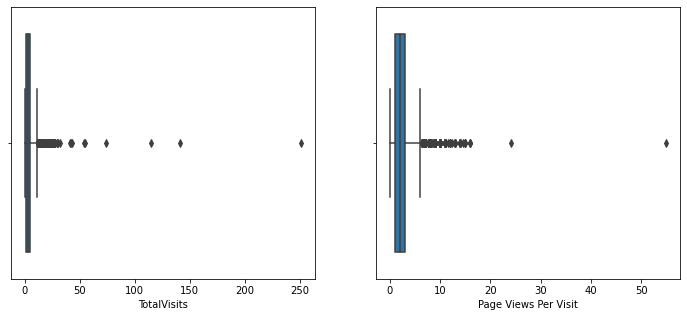

In [28]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(leads['TotalVisits'])
plt.subplot(1, 2, 2)
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

As we see, there are some outliers that should be treated. For now, let's impute the missing values in these columns with the median value.

In [29]:
# Imputing the missing values in numerical columns with median.

leads['TotalVisits'] = leads['TotalVisits'].fillna(leads['TotalVisits'].median())
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median())
round(100*(leads.isnull().sum())/leads.shape[0], 2).sort_values(ascending=False)

Prospect ID                                 0.0
Search                                      0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
What is your current occupation             0.0
Lead Number                                 0.0
Specialization                              0.0
Country                                     0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                             

In [30]:
# Checking the missing values.

leads.isnull().sum().sum()

0

### Further Examination and Cleaning of the Data

Let us inspect the dataframe closely.

In [31]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

'Prospect ID' is an unnecessary column, we can drop it and set 'Lead Number' column to be the index.

In [32]:
# Dropping 'Prospect ID' and making 'Lead Number' the index.

leads = leads.set_index('Lead Number')
leads = leads.drop('Prospect ID', axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Unknown,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [33]:
# Storring names of the object type columns in a variable.

obj_col = [col for col in leads.columns if leads[col].dtype == np.object]
obj_col, len(obj_col)

(['Lead Origin',
  'Lead Source',
  'Do Not Email',
  'Do Not Call',
  'Last Activity',
  'Country',
  'Specialization',
  'What is your current occupation',
  'Search',
  'Magazine',
  'Newspaper Article',
  'X Education Forums',
  'Newspaper',
  'Digital Advertisement',
  'Through Recommendations',
  'Receive More Updates About Our Courses',
  'Update me on Supply Chain Content',
  'Get updates on DM Content',
  'I agree to pay the amount through cheque',
  'A free copy of Mastering The Interview',
  'Last Notable Activity'],
 21)

In [34]:
# Storring names of numeric type columns in a variable.

num_col = [col for col in leads.columns if col != 'Converted' and (leads[col].dtype == np.number or leads[col].dtype == np.int)]
num_col

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

Let us plot the categorical columns distributions to get some insight into the data.

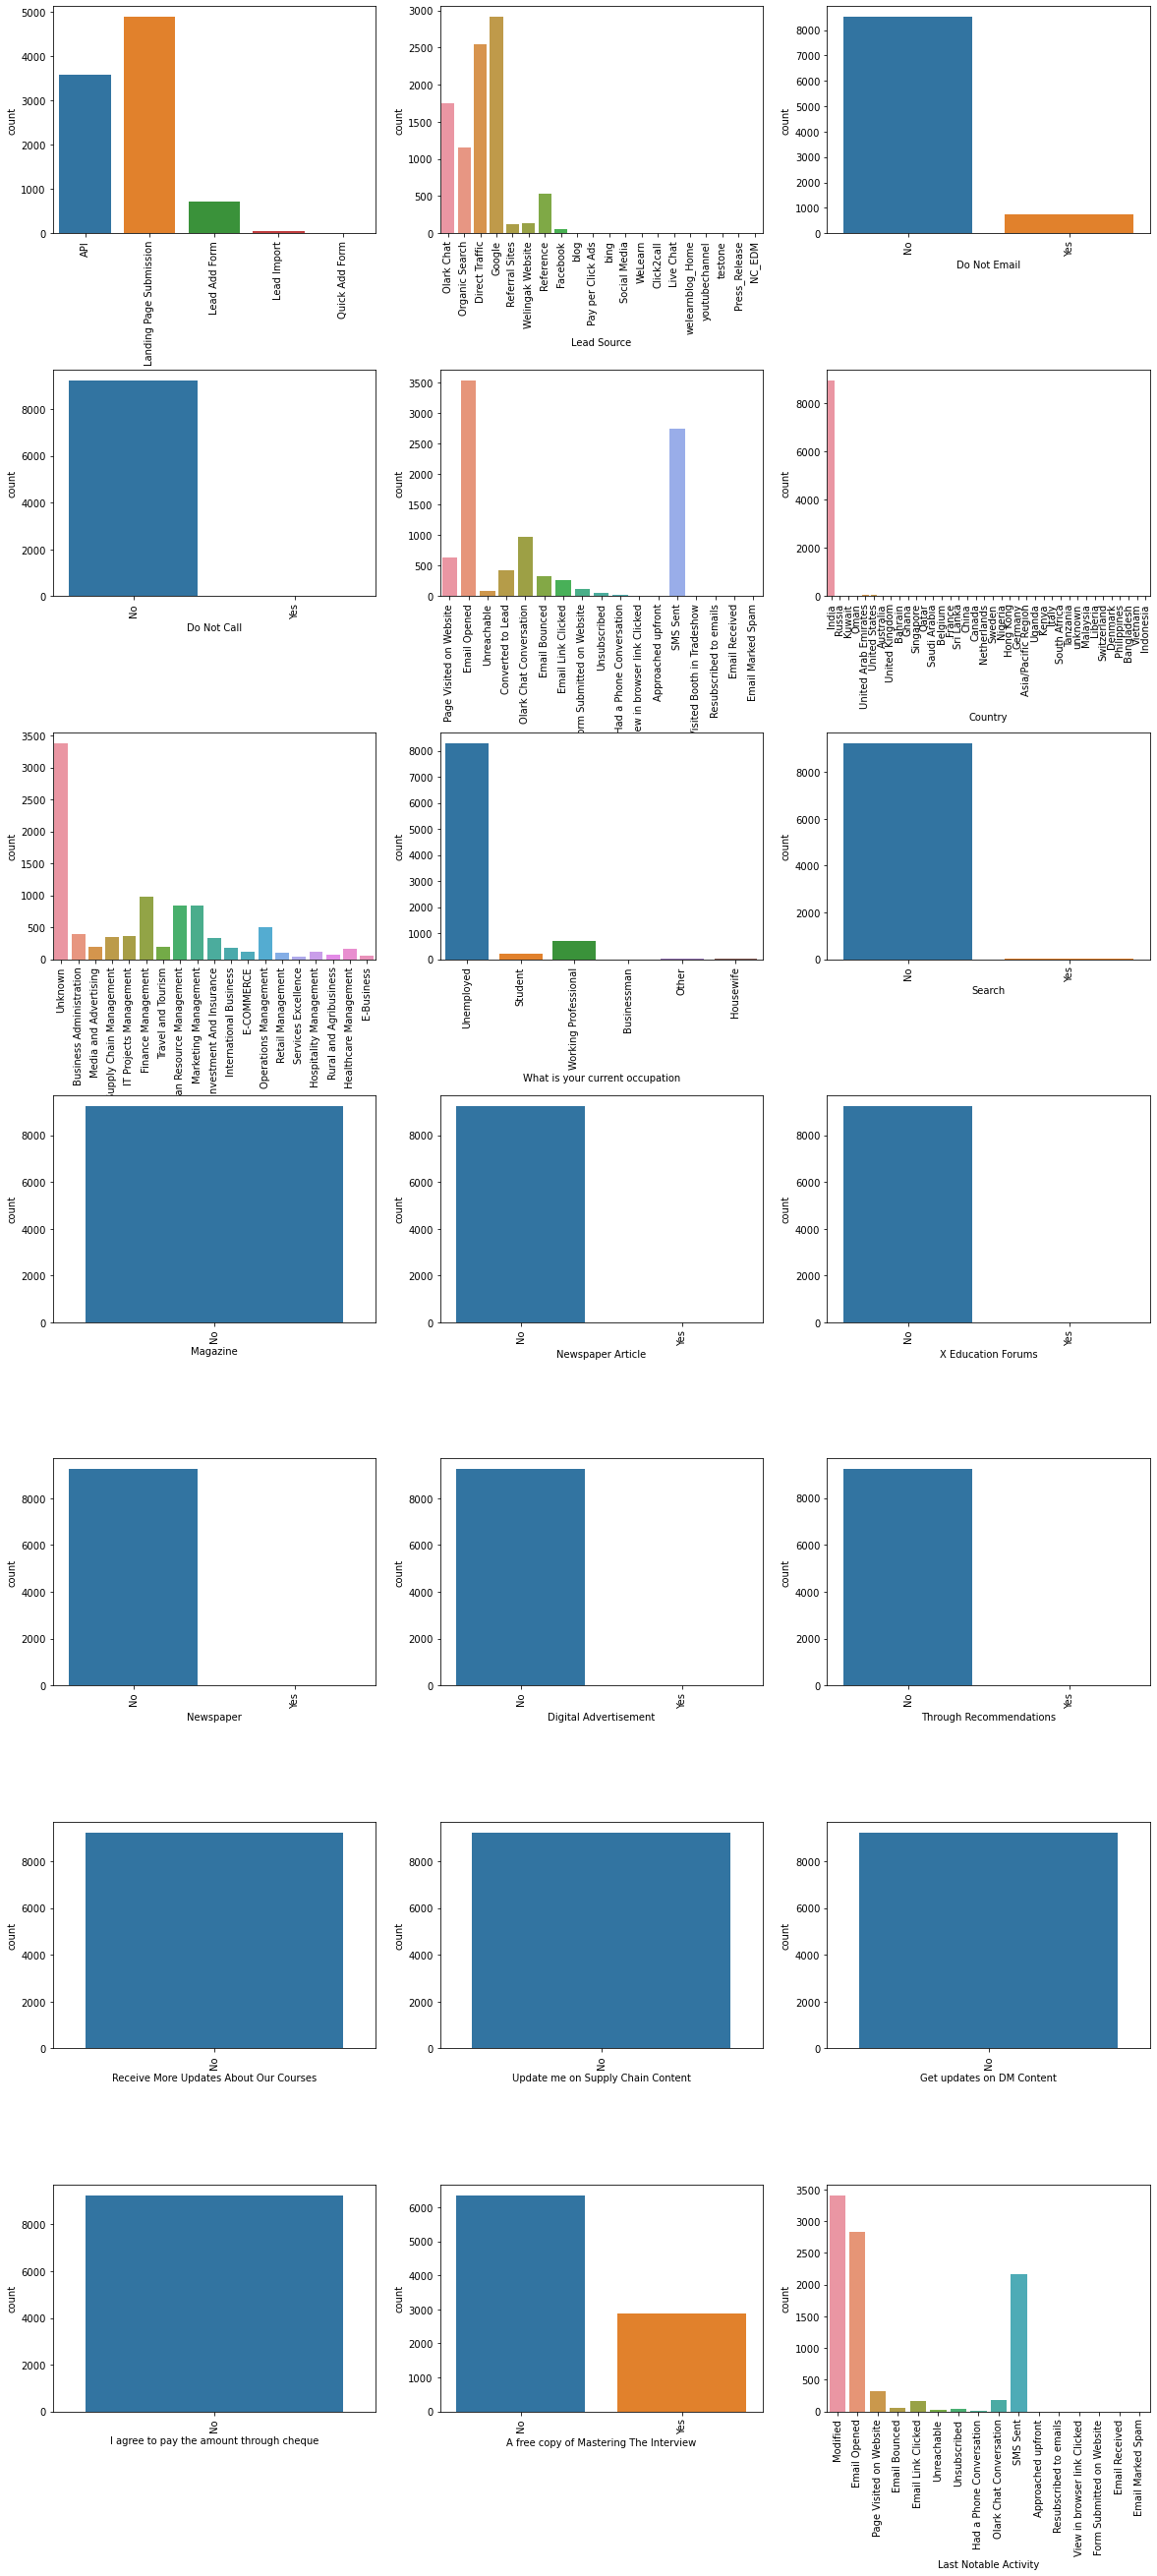

In [35]:
# Plotting the categorical columns.

plt.figure(figsize=(20, 45))
plt.subplots_adjust(hspace=0.6)
for plot in enumerate(obj_col):
    plt.subplot(7, 3, plot[0]+1)
    sns.countplot(plot[1], data=leads)
    plt.xticks(rotation=90)
plt.show()

In [36]:
# Looking at the value percentages.

for col in enumerate(obj_col):
    print(col[1])
    print(round(100*(leads[col[1]].value_counts()/leads.shape[0]), 2), end='\n\n')

Lead Origin
Landing Page Submission    52.88
API                        38.74
Lead Add Form               7.77
Lead Import                 0.60
Quick Add Form              0.01
Name: Lead Origin, dtype: float64

Lead Source
Google               31.48
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
Click2call            0.04
Social Media          0.02
Live Chat             0.02
Press_Release         0.02
Pay per Click Ads     0.01
blog                  0.01
WeLearn               0.01
welearnblog_Home      0.01
youtubechannel        0.01
testone               0.01
NC_EDM                0.01
Name: Lead Source, dtype: float64

Do Not Email
No     92.06
Yes     7.94
Name: Do Not Email, dtype: float64

Do Not Call
No     99.98
Yes     0.02
Name: Do Not Call, dtype: float64

Last Activity
Email Opened                    38.31
S

From the countplots we can see that many columns are clearly imbalanced (or only have one value in them). They won't have any value for our model, therefore, they can be dropped.

Let us consider a threshold of 90%. If one value takes up >= 90% of the whole column, we consider it imbalanced.

In [37]:
# Getting the list of columns to drop.

col_to_drop = []

for col in enumerate(obj_col):
    col_dict = dict(round(100*(leads[col[1]].value_counts()/leads.shape[0]), 2)>=90)
    first_key = list(col_dict.keys())[0]
    if col_dict[first_key] == True:
        col_to_drop.append(col[1])
col_to_drop

['Do Not Email',
 'Do Not Call',
 'Country',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [38]:
# Dropping the imbalanced columns.

leads = leads.drop(col_to_drop, axis=1)
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,No,Modified
660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,No,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,No,Modified


In [39]:
# Storring the new list of categorical features in a variable.

obj_col = [col for col in leads.columns if leads[col].dtype == np.object]
obj_col, len(obj_col)

(['Lead Origin',
  'Lead Source',
  'Last Activity',
  'Specialization',
  'What is your current occupation',
  'A free copy of Mastering The Interview',
  'Last Notable Activity'],
 7)

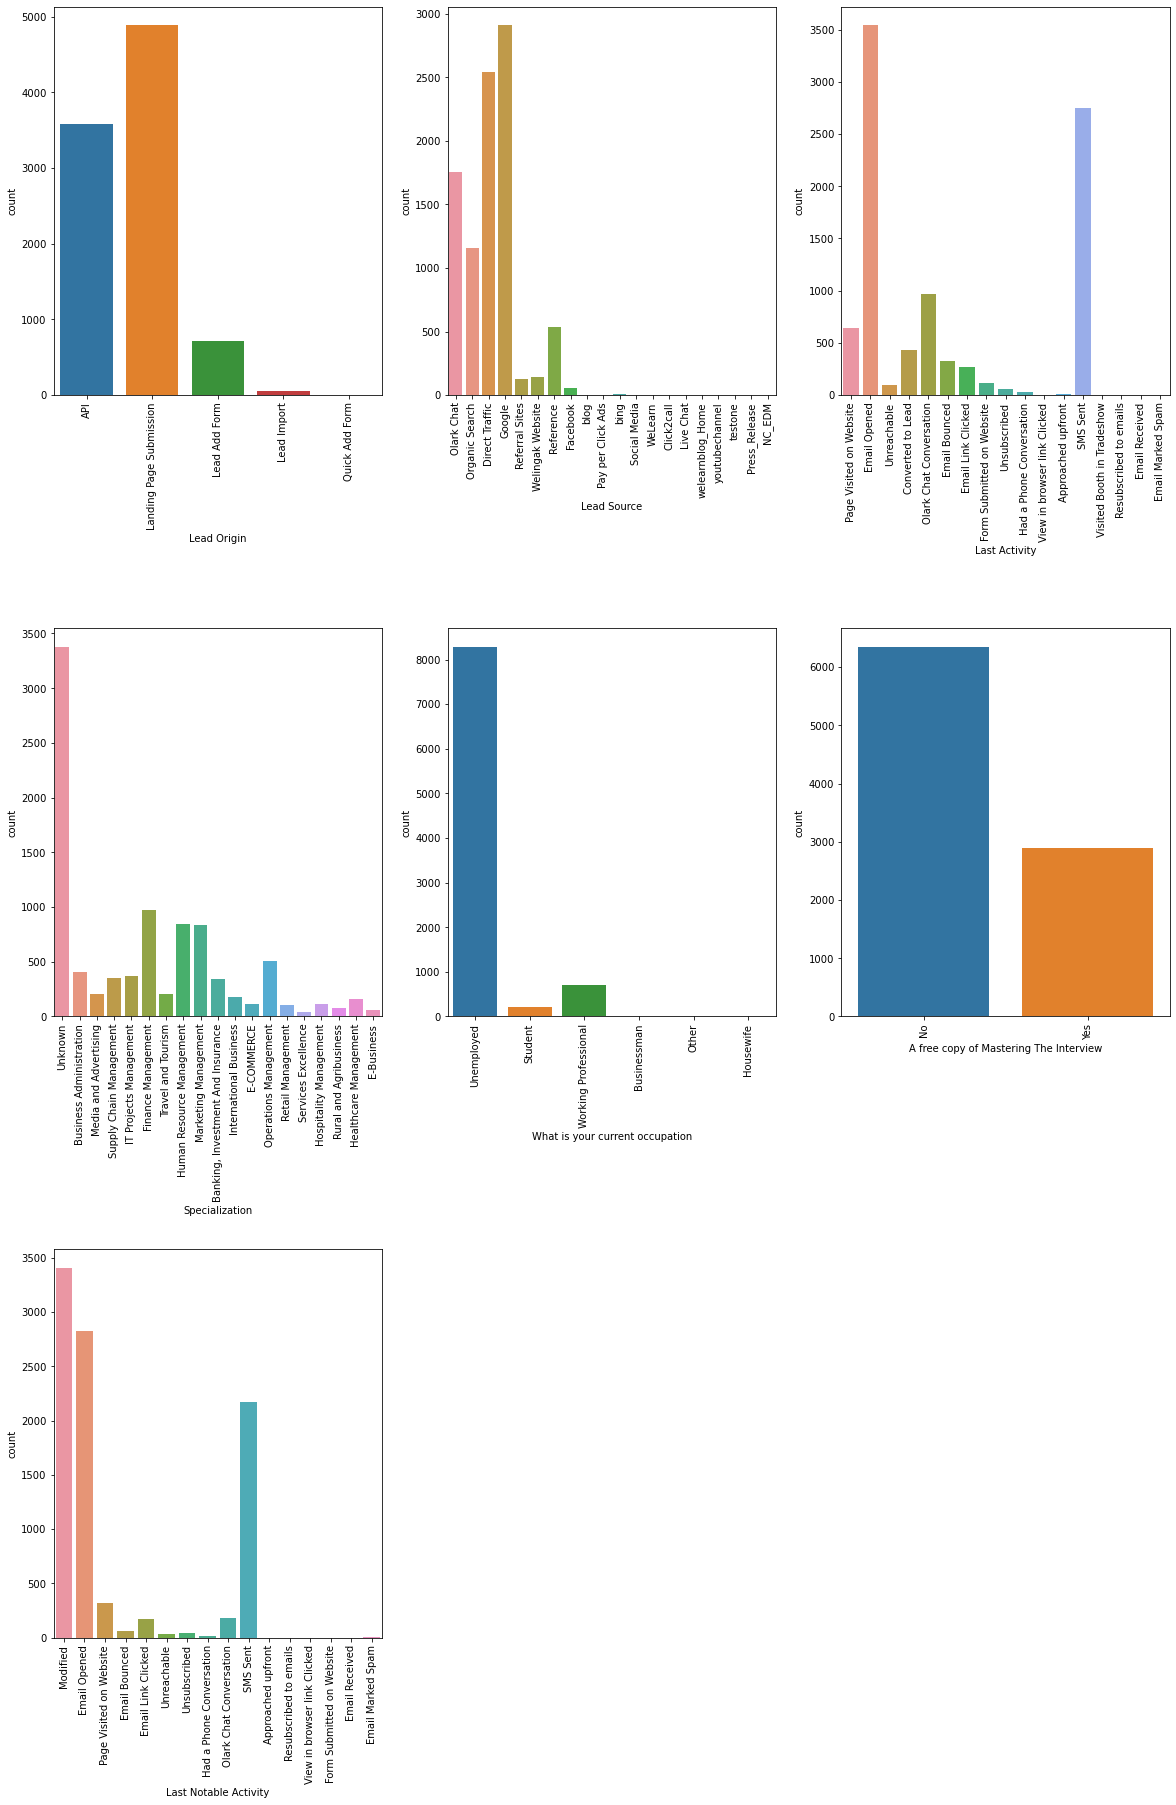

In [40]:
# Plotting the remaining categorical columns.

plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.6)
for col in enumerate(obj_col):
    plt.subplot(3, 3, col[0]+1)
    sns.countplot(col[1], data=leads)
    plt.xticks(rotation=90)
plt.show()

The columns 'Lead Source', 'Last Activity', 'Specialization' and 'Last Notable Activity' have too many categories. Some of these categories have very few observations. A new category can be created (like 'Other') in order to store these low-count categories.

In [41]:
# Renaming 'What is your current occupation' column.

leads = leads.rename({'What is your current occupation': 'Occupation'}, axis=1)
leads.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [42]:
# Checking the value counts in 'Lead Source' column.

leads['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

It would make sense to combine all the categories with less than 1000 records into the 'Other' category. However, 'Reference' seems to be an important value, so let us combine the values with the record count less than 500 into 'Other'.

In [43]:
# Replacing the categories having the value count of less than 500 with 'Other'.

lead_source_dict = dict(leads['Lead Source'].value_counts()<500)
for cat in lead_source_dict.keys():
    if lead_source_dict[cat] == True:
        leads['Lead Source'] = leads['Lead Source'].replace(cat, 'Other')
leads['Lead Source'].value_counts()

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Other              345
Name: Lead Source, dtype: int64

In [44]:
# Checking the value counts in 'Last Activity' column.

leads['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [45]:
# Replacing the categories having the value count of less than 500 with 'Other'.

last_act_dict = dict(leads['Last Activity'].value_counts()<500)
for cat in last_act_dict.keys():
    if last_act_dict[cat] == True:
        leads['Last Activity'] = leads['Last Activity'].replace(cat, 'Other')
leads['Last Activity'].value_counts()

Email Opened               3540
SMS Sent                   2745
Other                      1342
Olark Chat Conversation     973
Page Visited on Website     640
Name: Last Activity, dtype: int64

In [46]:
# Checking the value counts in 'Specialization' column.

leads['Specialization'].value_counts()

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [47]:
# Replacing the categories having the value count of less than 500 with 'Other'.

spec_dict = dict(leads['Specialization'].value_counts()<500)
for cat in spec_dict.keys():
    if spec_dict[cat] == True:
        leads['Specialization'] = leads['Specialization'].replace(cat, 'Other')
leads['Specialization'].value_counts()

Unknown                      3380
Other                        2695
Finance Management            976
Human Resource Management     848
Marketing Management          838
Operations Management         503
Name: Specialization, dtype: int64

In [48]:
# Checking the value counts in 'Last Notable Activity' column.

leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [49]:
# Replacing the categories having the value count of less than 500 with 'Other'.

last_notable_dict = dict(leads['Last Notable Activity'].value_counts()<500)
for cat in last_notable_dict.keys():
    if last_notable_dict[cat] == True:
        leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(cat, 'Other')
leads['Last Notable Activity'].value_counts()

Modified        3407
Email Opened    2827
SMS Sent        2172
Other            834
Name: Last Notable Activity, dtype: int64

### EDA

#### Univariate Analysis (Categorical Variables)

Let us plot the updated categorical columns and draw any useful insights we can.

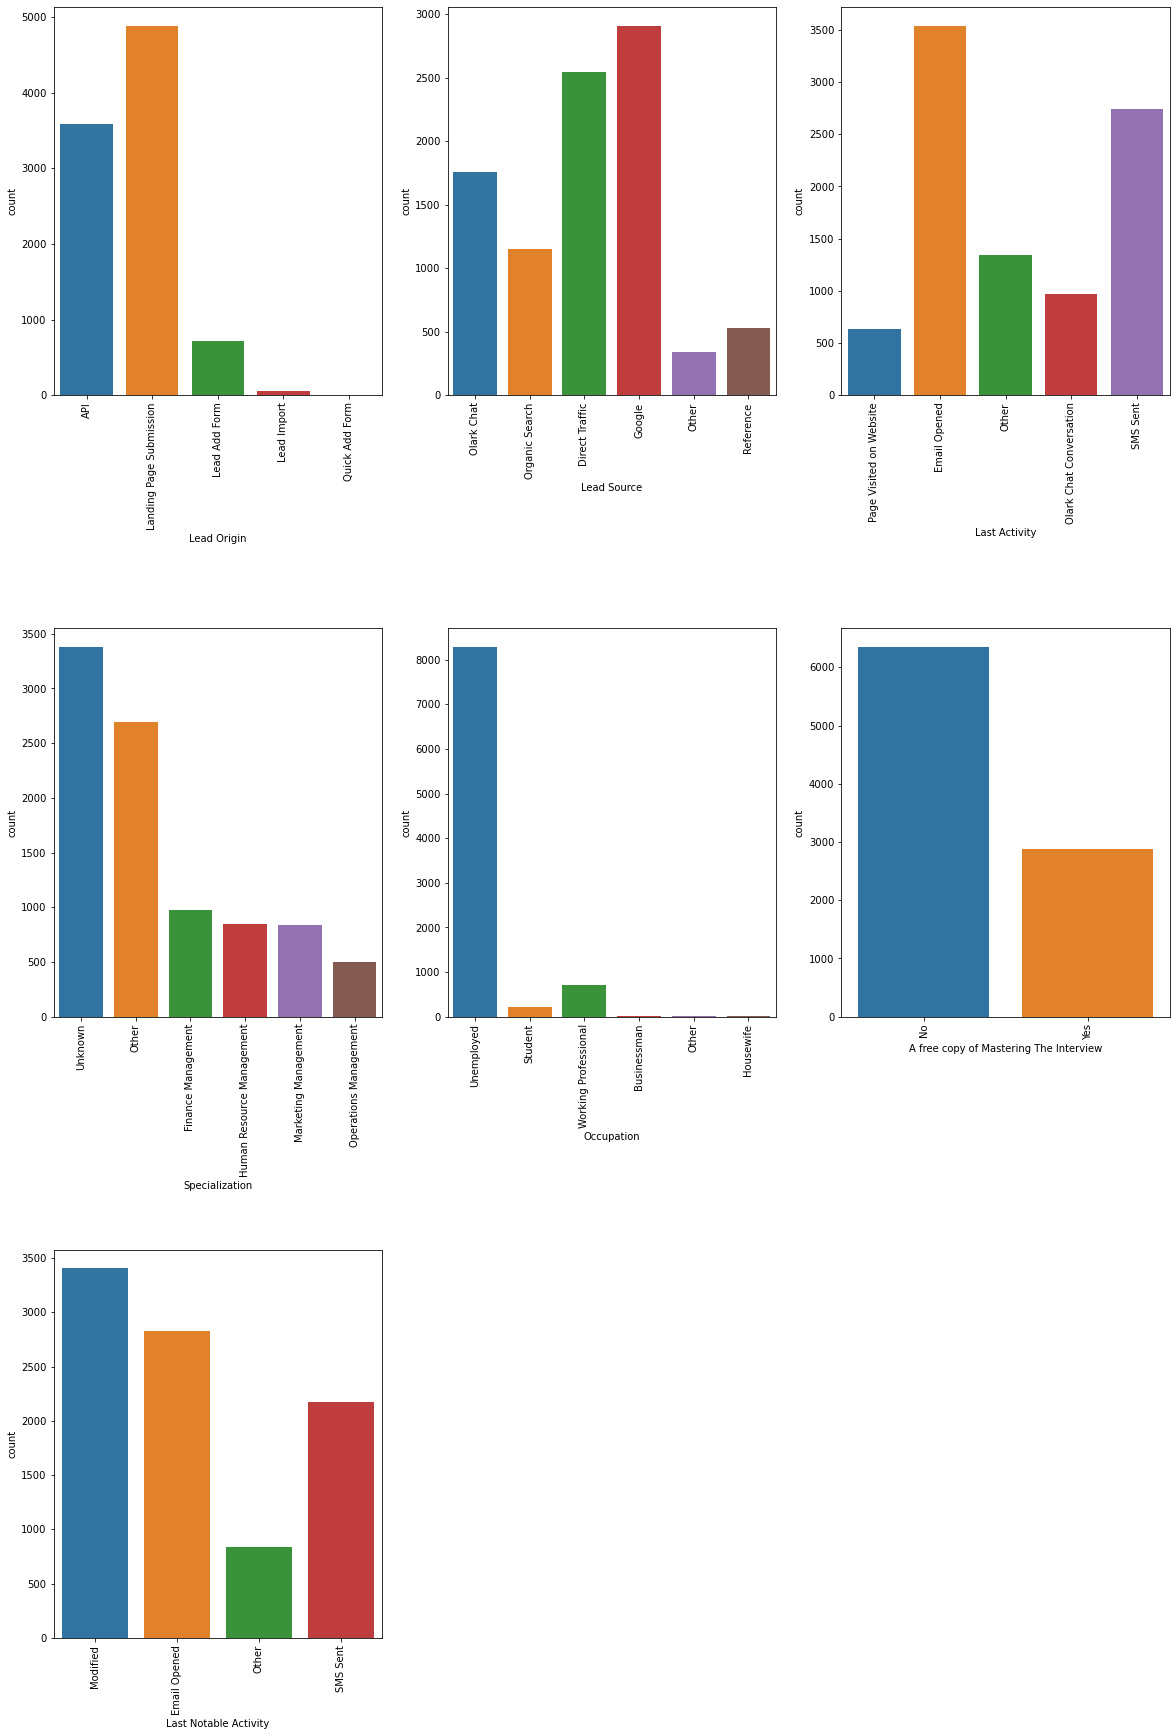

In [50]:
# Plotting the updated categorical columns.

obj_col = [col for col in leads.columns if leads[col].dtype == np.object]

plt.figure(figsize=(20, 30))
plt.subplots_adjust(hspace=0.6)
for col in enumerate(obj_col):
    plt.subplot(3, 3, col[0]+1)
    sns.countplot(col[1], data=leads)
    plt.xticks(rotation=90)
plt.show()

**Insights:**

    1. The leads mostly originate from landing a page submission or through the API.
    2. The three main sources of leads are: - Google
                                            - Direct Traffic
                                            - Olark Chat
    3. Email Opened and SMS Sent are the most occurring last activities.
    4. Out of known specializations, the ones connected to management are more popular with the leads.
    5. Most of the leads are unemployed.
    6. Around 70% of the people don't want a free copy of 'Mastering The Interview'.
    7. The most occurring last notable activity is Modified, with Email Opened and SMS Sent being second and third respectively.

#### Unvariate Analysis (Numeric Variables)

Let us plot the numerical columns and draw any useful insights we can.

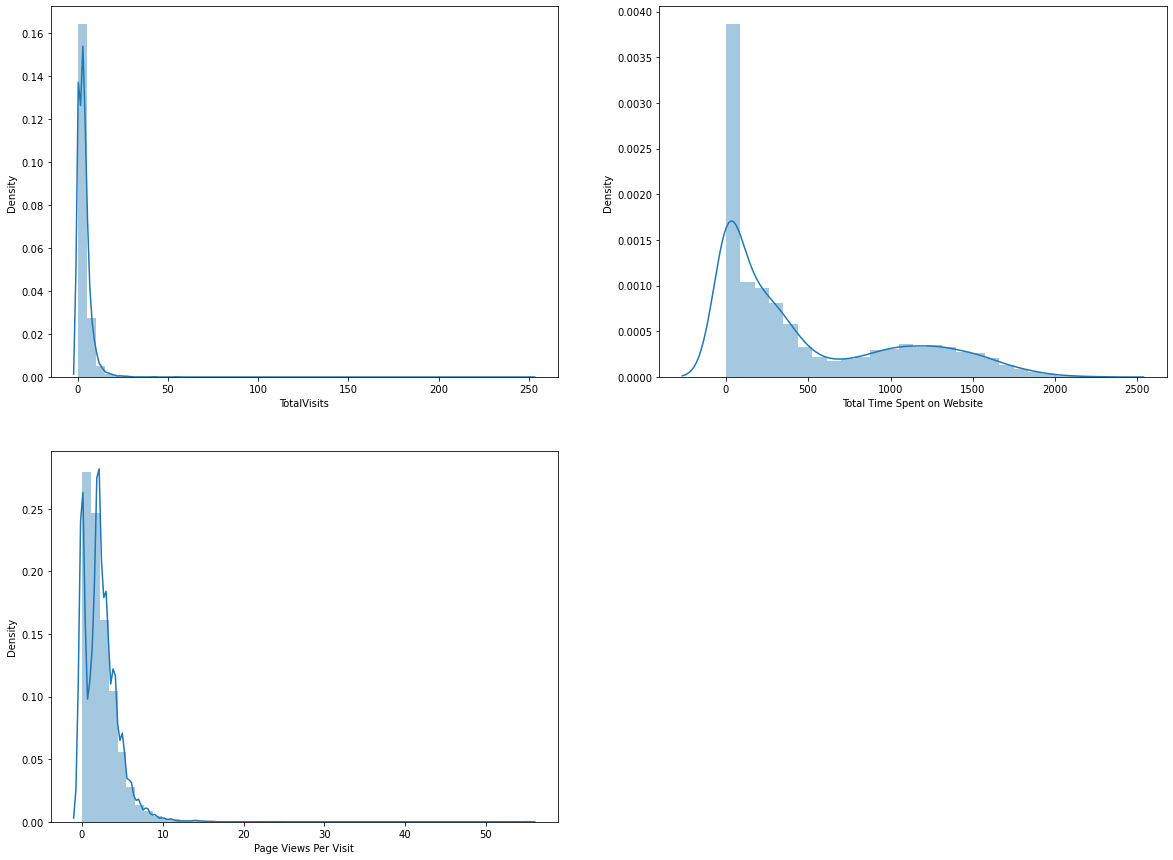

In [51]:
# Plotting the numeric type columns.

num_col = [col for col in leads.columns if col != 'Converted' and (leads[col].dtype == np.number or leads[col].dtype == np.int)]

plt.figure(figsize=(20, 15))
for col in enumerate(num_col):
    plt.subplot(2, 2, col[0]+1)
    sns.distplot(leads[col[1]])
plt.show()

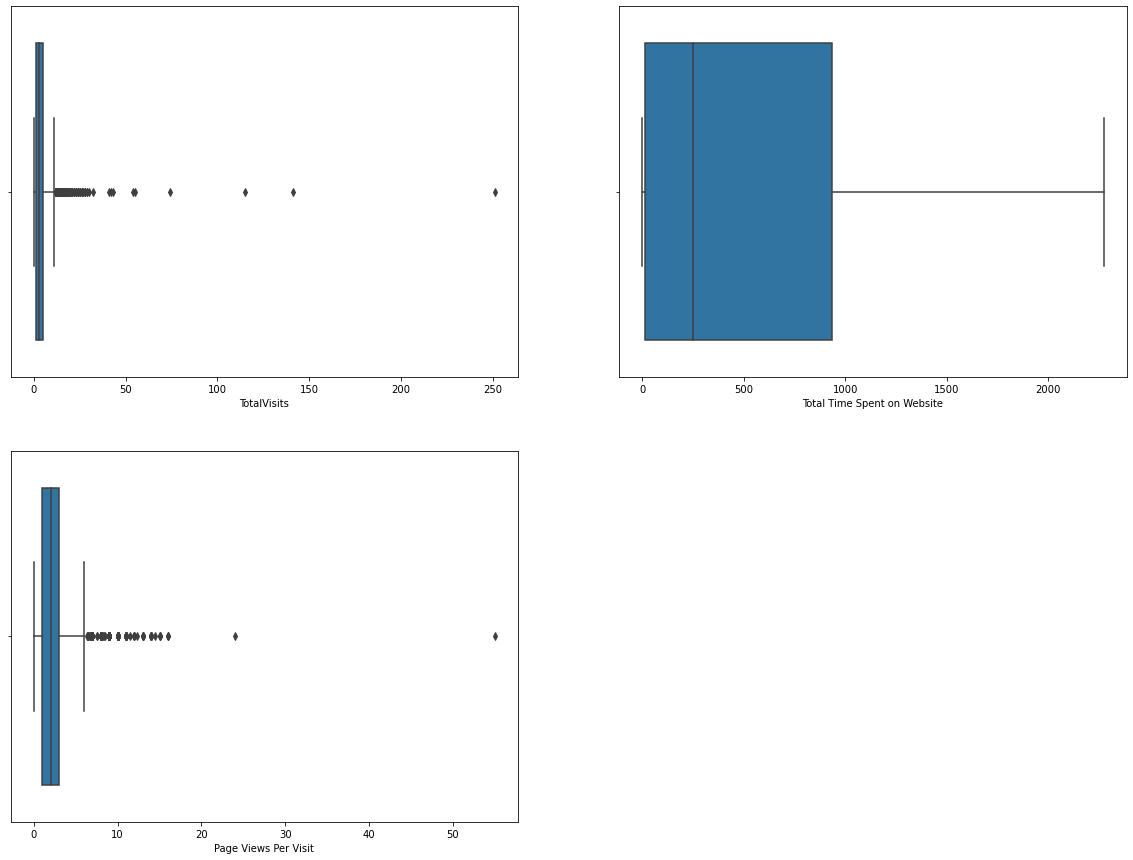

In [52]:
plt.figure(figsize=(20, 15))
for col in enumerate(num_col):
    plt.subplot(2, 2, col[0]+1)
    sns.boxplot(leads[col[1]])
plt.show()

In [53]:
# Basic statistics for the numerical columns.

num_col_quantiles = [0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
leads[num_col].describe(percentiles=num_col_quantiles)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


**Insights:**

    1. The columns 'Page Views Per Visit' and 'TotalVisits' have plenty of outliers.
    2. 95% of the records have visited the website 10 or fewer times and viewed 6 or fewer pages.

#### Outlier Treatment

In [54]:
# Removing the statistical outliers (0.05 and 0.95 percentiles).

Q1 = leads['TotalVisits'].quantile(0.05)
Q3 = leads['TotalVisits'].quantile(0.95)
IQR = Q3-Q1
leads = leads[(leads['TotalVisits'] >= Q1-1.5*IQR) & (leads['TotalVisits'] <= Q3+1.5*IQR)]

Q1 = leads['Page Views Per Visit'].quantile(0.05)
Q3 = leads['Page Views Per Visit'].quantile(0.95)
IQR = Q3-Q1
leads = leads[(leads['Page Views Per Visit'] >= Q1-1.5*IQR) & (leads['Page Views Per Visit'] <= Q3+1.5*IQR)]

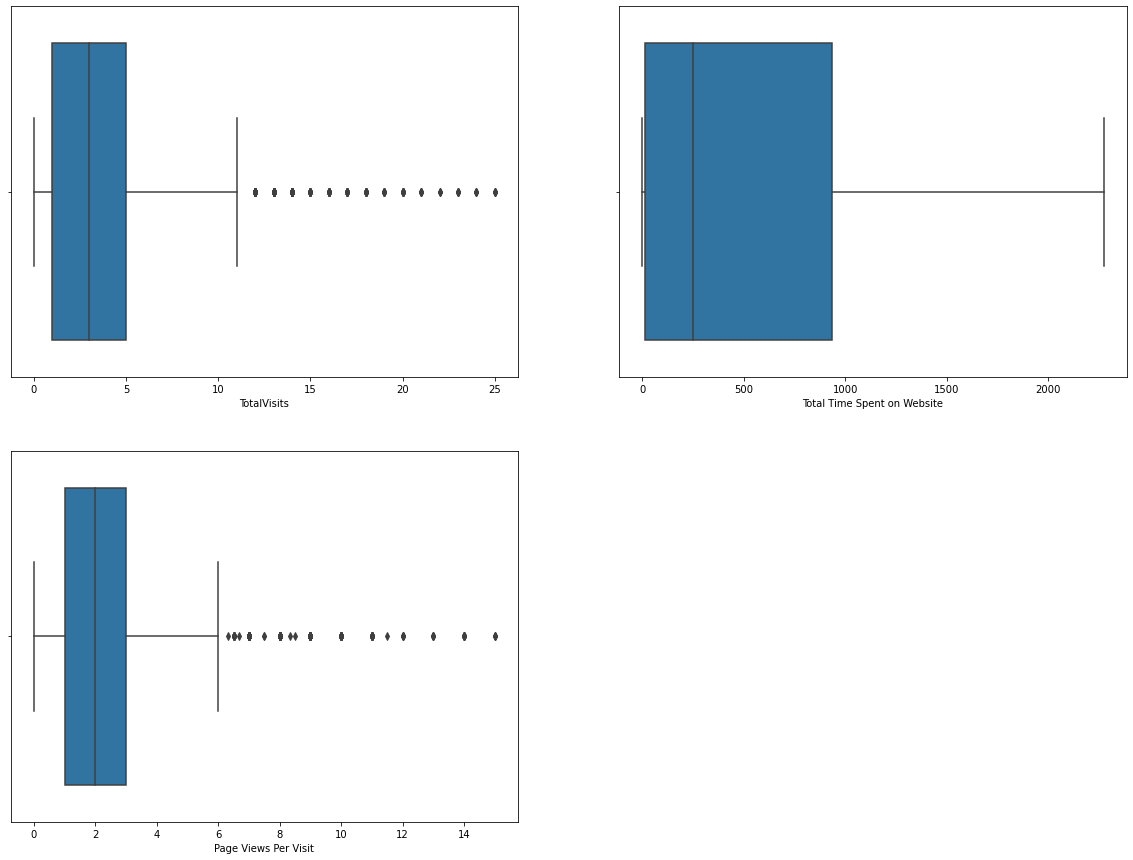

In [55]:
plt.figure(figsize=(20, 15))
for col in enumerate(num_col):
    plt.subplot(2, 2, col[0]+1)
    sns.boxplot(leads[col[1]])
plt.show()

Even though there are still some outliers, the boxplots look much better. There are no EXTREME values like 55 or 251. 

#### Bivariate Analysis

Checking the relationships between the predictor variables and the target variable using the countplot.

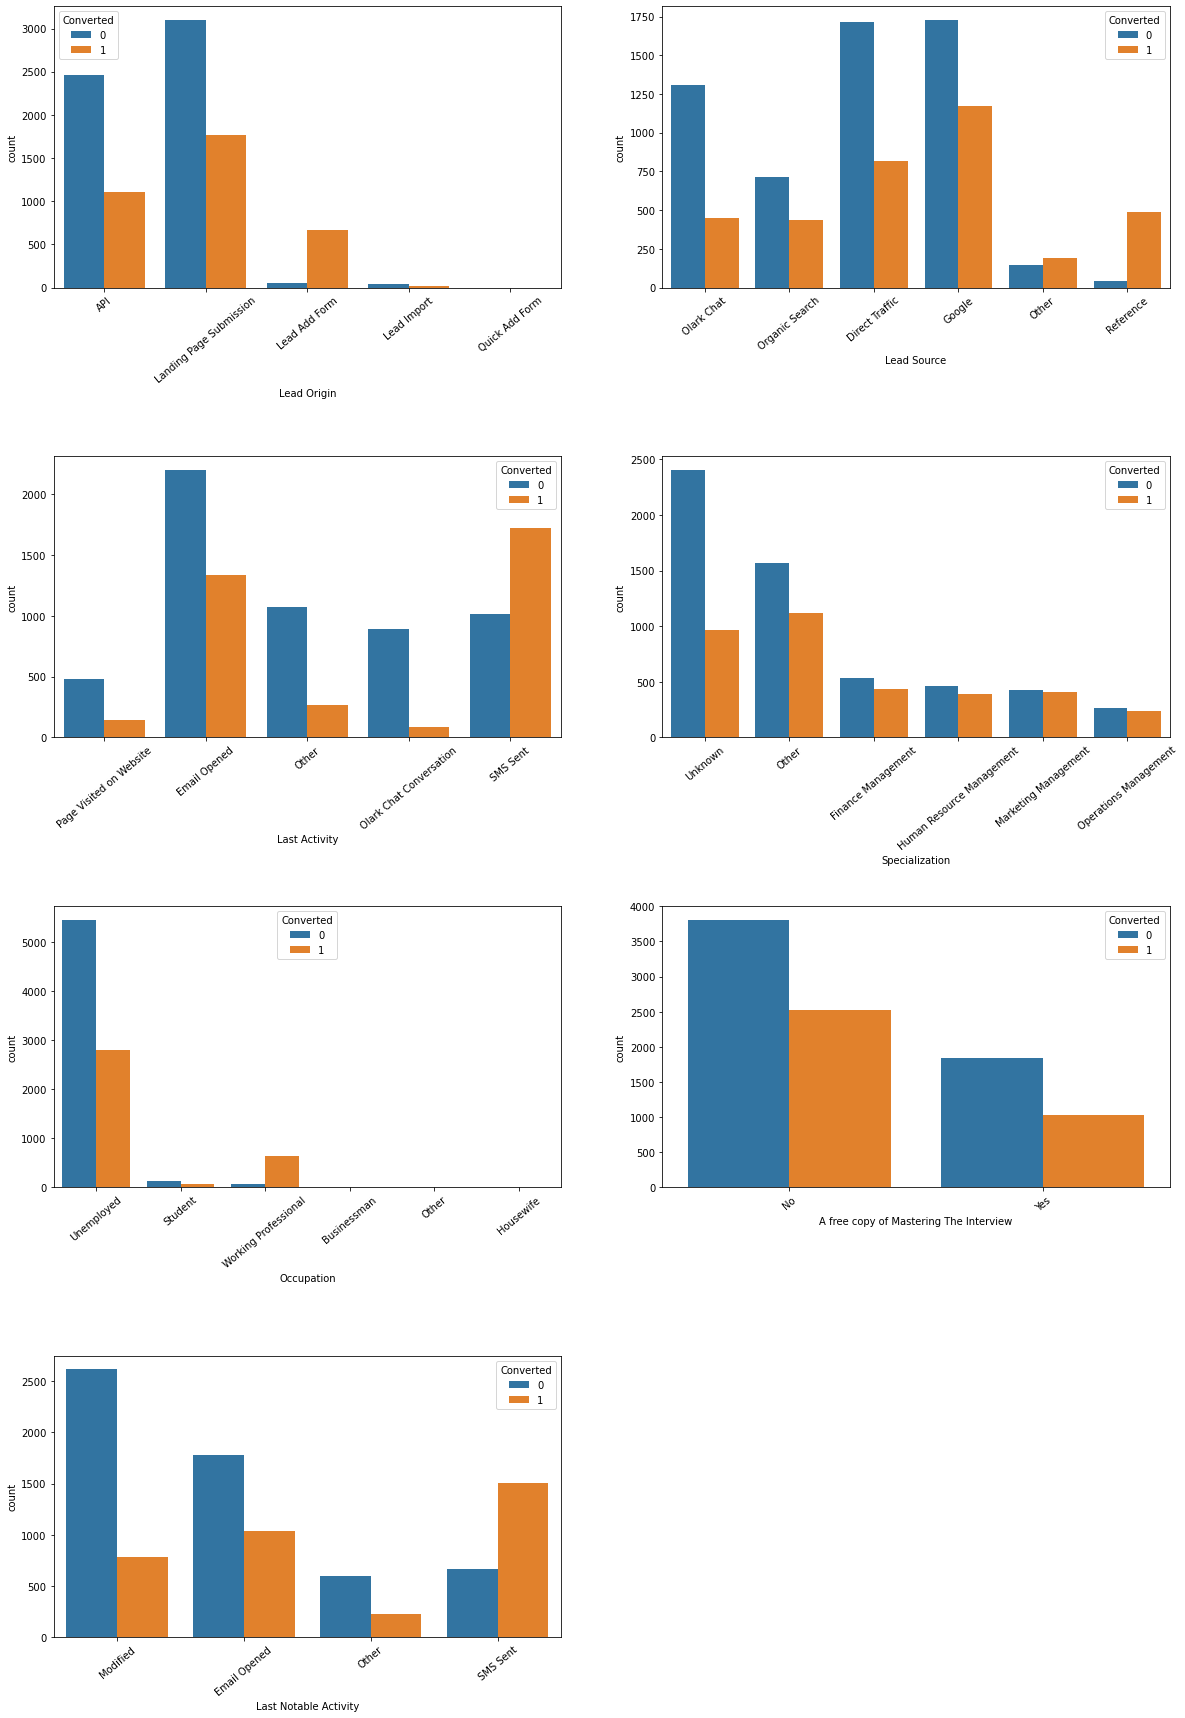

In [56]:
# Countplots for predictor variables and 'Converted'.

plt.figure(figsize=(20, 30))
for col in enumerate(obj_col):
    plt.subplot(4, 2, col[0]+1)
    sns.countplot(col[1], data=leads, hue='Converted')
    plt.subplots_adjust(hspace=0.6)
    plt.xticks(rotation=40)
plt.show()

**Insights:**

    1. In the column 'Lead Origin', much more leads that originated from the lead add forms got converted than not. Lead add form can be a good indicator of a lead becoming converted.
    2. The percentage of converted leads is much higher than non-converted among the leads that were reffered to X Education. Being reffered can be a good indicator of a future conversion.
    3. Most leads among working professionals got converted, which can be explained by their motivation to get better carreer prospects at the place of their current emoloyment. Lead being a working professional can be a good indicator of a lead becoming converted.
    4. 'Last Notable Activity' and 'Last Activity' columns are almost the same, therefore, one of them can be dropped.

In [57]:
# Dropping 'Last Activity Column'.

leads = leads.drop('Last Activity', axis=1)
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Occupation,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Unknown,Unemployed,No,Modified
660728,API,Organic Search,0,5.0,674,2.5,Unknown,Unemployed,No,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Other,Student,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Unemployed,No,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Unknown,Unemployed,No,Modified


Let us see if our prediction about the important features and values are correct. It's time to get the data ready for model building.

### Pre-processing

Let us begin with turning all values in the categorical columns into 0's and 1's, i.e. create dummy variables and map Yes'es and No's.

In [58]:
# Displaying the categorical columns.

obj_col

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'Occupation',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

#### Dummy Variables

In [59]:
# Mapping the values in 'A free copy of Mastering The Interview' column.

def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

leads[['A free copy of Mastering The Interview']] = leads[['A free copy of Mastering The Interview']].apply(binary_map)
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Occupation,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Unknown,Unemployed,0,Modified
660728,API,Organic Search,0,5.0,674,2.5,Unknown,Unemployed,0,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Other,Student,1,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Unemployed,0,Modified
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Unknown,Unemployed,0,Modified


In [60]:
# Creating dummy variables and dropping one of the options manually.

lo_dum = pd.get_dummies(leads['Lead Origin'], prefix='LeadOrigin')
lo_dum1 = lo_dum.drop('LeadOrigin_Quick Add Form', axis=1)
leads = pd.concat([leads, lo_dum1], axis=1)

ls_dum = pd.get_dummies(leads['Lead Source'], prefix='LeadSource')
ls_dum1 = ls_dum.drop('LeadSource_Olark Chat', axis=1)
leads = pd.concat([leads, ls_dum1], axis=1)

spec_dum = pd.get_dummies(leads['Specialization'], prefix='Specialization')
spec_dum1 = spec_dum.drop('Specialization_Human Resource Management', axis=1)
leads = pd.concat([leads, spec_dum1], axis=1)

occup_dum = pd.get_dummies(leads['Occupation'], prefix='Occupation')
occup_dum1 = occup_dum.drop('Occupation_Businessman', axis=1)
leads = pd.concat([leads, occup_dum1], axis=1)

lna_dum = pd.get_dummies(leads['Last Notable Activity'], prefix='NotableActivity')
lna_dum1 = lna_dum.drop('NotableActivity_Other', axis=1)
leads = pd.concat([leads, lna_dum1], axis=1)

leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Occupation,A free copy of Mastering The Interview,Last Notable Activity,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Organic Search,LeadSource_Other,LeadSource_Reference,Specialization_Finance Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,Specialization_Unknown,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,NotableActivity_Email Opened,NotableActivity_Modified,NotableActivity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,0,0.0,0,0.0,Unknown,Unemployed,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
660728,API,Organic Search,0,5.0,674,2.5,Unknown,Unemployed,0,Email Opened,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Other,Student,1,Email Opened,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other,Unemployed,0,Modified,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
660681,Landing Page Submission,Google,1,2.0,1428,1.0,Unknown,Unemployed,0,Modified,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


In [61]:
# Dropping the original columns.

leads = leads.drop(['Lead Origin', 'Lead Source', 'Specialization', 'Occupation', 'Last Notable Activity'], axis=1)
leads.head()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Organic Search,LeadSource_Other,LeadSource_Reference,Specialization_Finance Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,Specialization_Unknown,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,NotableActivity_Email Opened,NotableActivity_Modified,NotableActivity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
660728,0,5.0,674,2.5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
660727,1,2.0,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
660719,0,1.0,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
660681,1,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


#### Train-Test Split

In [62]:
# Importing train_test_split.

from sklearn.model_selection import train_test_split

In [63]:
# Creating X.

X = leads.drop('Converted', axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Organic Search,LeadSource_Other,LeadSource_Reference,Specialization_Finance Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,Specialization_Unknown,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,NotableActivity_Email Opened,NotableActivity_Modified,NotableActivity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
660728,5.0,674,2.5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
660727,2.0,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
660719,1.0,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
660681,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


In [64]:
# Creating y.

y = leads['Converted']
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [65]:
# Splitting the data into train and test.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [66]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train: (6449, 26)
y_train: (6449,)
X_test:  (2765, 26)
y_test:  (2765,)


#### Feature Scaling

In [67]:
# Importing the Scaler.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [68]:
# Scaling the X_train.

X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Organic Search,LeadSource_Other,LeadSource_Reference,Specialization_Finance Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,Specialization_Unknown,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,NotableActivity_Email Opened,NotableActivity_Modified,NotableActivity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,
638862,0.520598,-0.715514,1.307156,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
631647,-0.094975,0.057816,-0.164590,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
580548,0.212811,2.673012,0.816574,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
589007,0.212811,-0.463774,-0.493279,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
589437,0.828384,-0.461963,1.797738,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0


In [69]:
# Checking the conversion rate.

conversion = (sum(leads['Converted'])/len(leads['Converted'].index))*100
conversion

38.571738658563056

#### Checking the Correlation

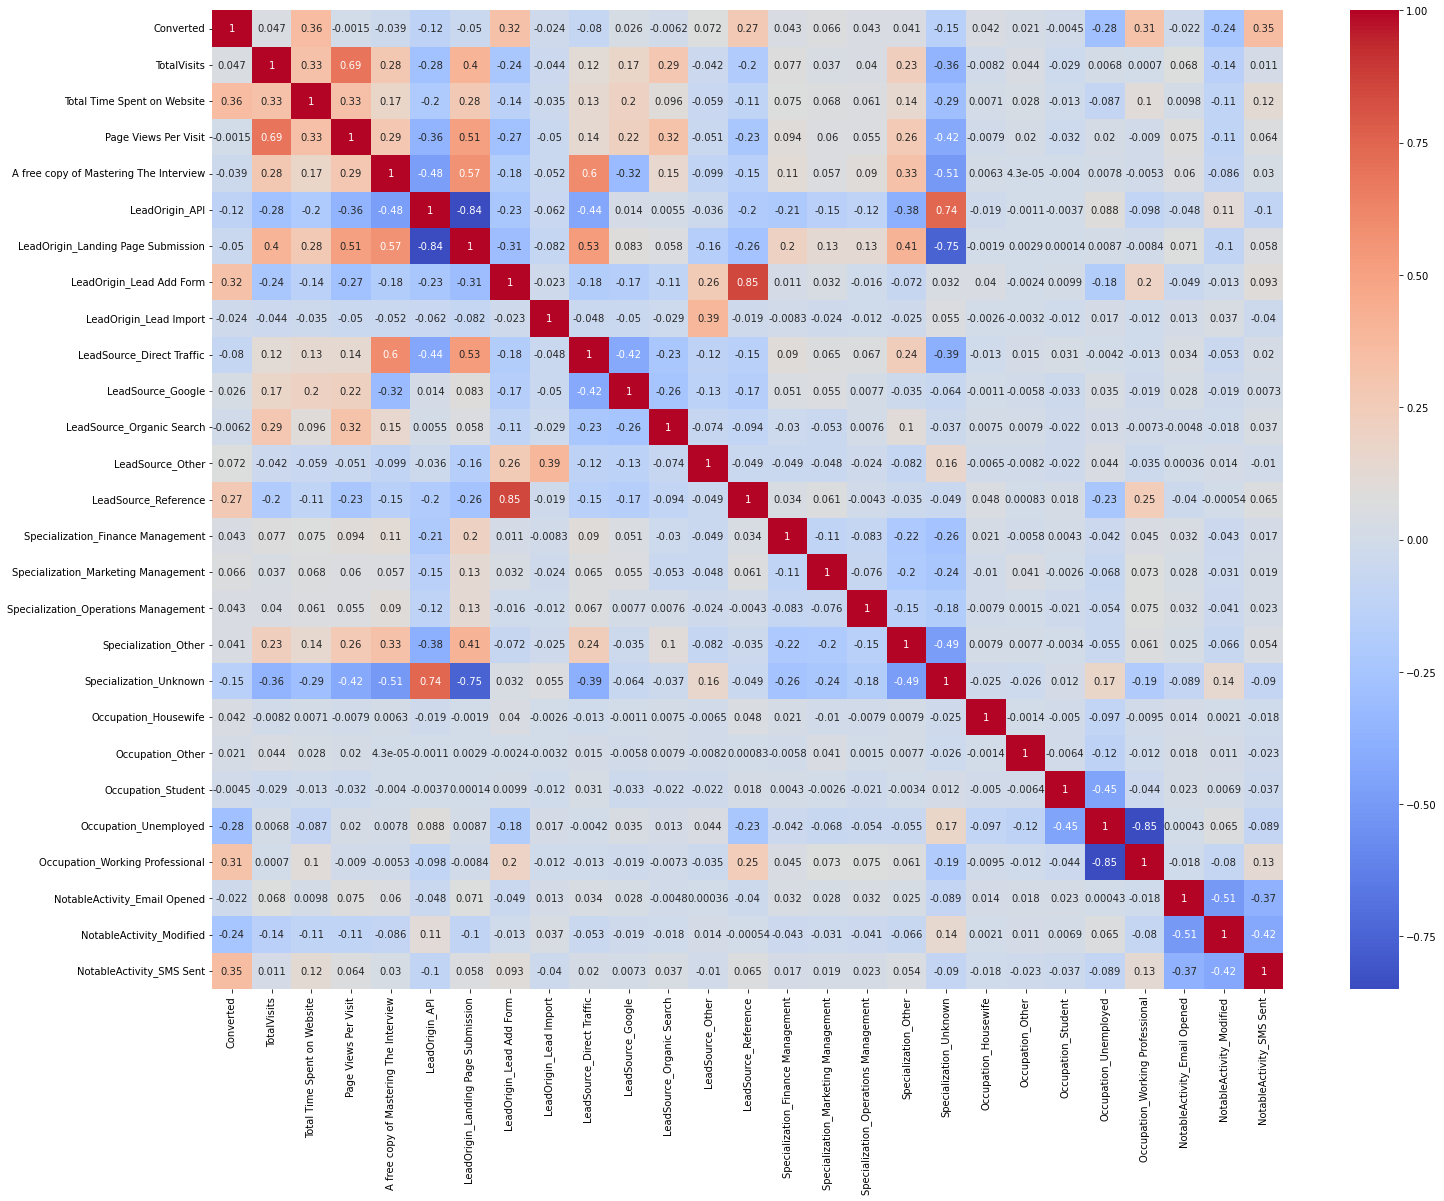

In [70]:
# Displaying the correlation heatmap.

plt.figure(figsize=(24, 18))
sns.heatmap(leads.corr(), cmap='coolwarm', annot=True)
plt.show()

Some of the columns are highly correlated. As we are going to use RFE, it will select the features itself.

## 4. Model Building

We are going to use StatsModels, as it shows detailed statistics.

But first, we need to select the features using RFE.

### Feature Selection Using RFE

In [71]:
# Importing LogisticRegression and RFE from SKLearn.

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# RFE

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [72]:
# Displaying the features and the support.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('A free copy of Mastering The Interview', False, 8),
 ('LeadOrigin_API', False, 2),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', True, 1),
 ('LeadSource_Direct Traffic', True, 1),
 ('LeadSource_Google', True, 1),
 ('LeadSource_Organic Search', True, 1),
 ('LeadSource_Other', False, 3),
 ('LeadSource_Reference', True, 1),
 ('Specialization_Finance Management', False, 11),
 ('Specialization_Marketing Management', False, 9),
 ('Specialization_Operations Management', False, 12),
 ('Specialization_Other', False, 10),
 ('Specialization_Unknown', True, 1),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', False, 4),
 ('Occupation_Student', True, 1),
 ('Occupation_Unemployed', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('NotableActivity_Email Opened', True, 1),
 ('NotableActivity_Modified', 

In [73]:
# Getting the significant columns based on RFE.support_.

col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadOrigin_Lead Import',
       'LeadSource_Direct Traffic', 'LeadSource_Google',
       'LeadSource_Organic Search', 'LeadSource_Reference',
       'Specialization_Unknown', 'Occupation_Housewife', 'Occupation_Student',
       'Occupation_Unemployed', 'Occupation_Working Professional',
       'NotableActivity_Email Opened', 'NotableActivity_SMS Sent'],
      dtype='object')

### Model 1

In [74]:
# Importing statsmodels.

import statsmodels.api as sm

In [75]:
# Building the model based on the features sellected by RFE.

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6433
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2733.3
Date:                Wed, 16 Nov 2022   Deviance:                       5466.7
Time:                        00:38:12   Pearson chi2:                 7.18e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3885
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  1.2333      0.689      1.791      0.073      -0.116       2.583
Total Time Spent on Website            1.0803      0.039     27.639      0.000       1.004       1.157
LeadOrigin_Landing Page Submission    -0.9305      0.133     -7.014      0.000      -1.191      -0.671
LeadOrigin_Lead Add Form               3.9859      0.407      9.805      0.000       3.189       4.783
LeadOrigin_Lead Import                -0.7221      0.524     -1.378      0.168      -1.749       0.305
LeadSource_Direct Traffic             -0.9864      0.140     -7.057      0.000      -1.260      -0.712
LeadSource_Google                     -0.7324      0.119     -6.137      0.000      -0.966      -0.498
LeadSource_Organic Search             -0.8124      0.139     -5.832      0.000      -1.085      -0.539
LeadSource_Reference                  -1.5152      0.452     -3.353      0.001      -2.401      -0.629
Specialization_Unknown                -1.1110      0.121     -9.165      0.000      -1.349      -0.873
Occupation_Housewife                  21.5158   1.33e+04      0.002      0.999   -2.61e+04    2.62e+04
Occupation_Student                    -0.9664      0.714     -1.353      0.176      -2.366       0.433
Occupation_Unemployed                 -1.3590      0.679     -2.001      0.045      -2.690      -0.028
Occupation_Working Professional        1.1613      0.702      1.655      0.098      -0.214       2.537
NotableActivity_Email Opened           0.7271      0.080      9.072      0.000       0.570       0.884
NotableActivity_SMS Sent               2.1065      0.088     24.001      0.000       1.934       2.278
======================================================================================================
"""

Some of the features have high p-values, which means they are insignificant.

Let us also look at the VIFs.

In [76]:
# Importing variace_inflation_factor from statsmodels.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
# Creating the VIF dataframe.

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
11,Occupation_Unemployed,13.69
1,LeadOrigin_Landing Page Submission,8.12
4,LeadSource_Direct Traffic,4.56
8,Specialization_Unknown,4.56
7,LeadSource_Reference,4.44
2,LeadOrigin_Lead Add Form,4.42
5,LeadSource_Google,3.65
6,LeadSource_Organic Search,2.07
12,Occupation_Working Professional,1.99
13,NotableActivity_Email Opened,1.69


Let us drop 'Occupation_Housewife' column, as it has an extremely high p-value.

In [78]:
# Dropping 'Occupation_Housewife' column.

col = col.drop('Occupation_Housewife')
col

Index(['Total Time Spent on Website', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadOrigin_Lead Import',
       'LeadSource_Direct Traffic', 'LeadSource_Google',
       'LeadSource_Organic Search', 'LeadSource_Reference',
       'Specialization_Unknown', 'Occupation_Student', 'Occupation_Unemployed',
       'Occupation_Working Professional', 'NotableActivity_Email Opened',
       'NotableActivity_SMS Sent'],
      dtype='object')

### Model 2

In [79]:
# Building the model based on the features sellected by RFE without 'Occupation_Housewife'.

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6434
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2735.6
Date:                Wed, 16 Nov 2022   Deviance:                       5471.2
Time:                        00:38:12   Pearson chi2:                 7.19e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3881
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  1.9571      0.633      3.090      0.002       0.716       3.198
Total Time Spent on Website            1.0793      0.039     27.618      0.000       1.003       1.156
LeadOrigin_Landing Page Submission    -0.9239      0.133     -6.966      0.000      -1.184      -0.664
LeadOrigin_Lead Add Form               3.9862      0.407      9.806      0.000       3.189       4.783
LeadOrigin_Lead Import                -0.7207      0.524     -1.376      0.169      -1.748       0.306
LeadSource_Direct Traffic             -0.9925      0.140     -7.100      0.000      -1.266      -0.719
LeadSource_Google                     -0.7319      0.119     -6.133      0.000      -0.966      -0.498
LeadSource_Organic Search             -0.8115      0.139     -5.827      0.000      -1.084      -0.539
LeadSource_Reference                  -1.5125      0.452     -3.347      0.001      -2.398      -0.627
Specialization_Unknown                -1.1098      0.121     -9.156      0.000      -1.347      -0.872
Occupation_Student                    -1.6911      0.659     -2.565      0.010      -2.983      -0.399
Occupation_Unemployed                 -2.0844      0.621     -3.356      0.001      -3.302      -0.867
Occupation_Working Professional        0.4354      0.646      0.674      0.500      -0.830       1.701
NotableActivity_Email Opened           0.7250      0.080      9.053      0.000       0.568       0.882
NotableActivity_SMS Sent               2.1050      0.088     23.994      0.000       1.933       2.277
======================================================================================================
"""

There are much fewer insignificant features now. Let us check the VIFs.

In [80]:
# Creating the VIF dataframe.

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
10,Occupation_Unemployed,13.51
1,LeadOrigin_Landing Page Submission,8.09
4,LeadSource_Direct Traffic,4.55
8,Specialization_Unknown,4.53
7,LeadSource_Reference,4.42
2,LeadOrigin_Lead Add Form,4.41
5,LeadSource_Google,3.64
6,LeadSource_Organic Search,2.06
11,Occupation_Working Professional,1.97
12,NotableActivity_Email Opened,1.69


Multicollinearity hasn't changed much. Let us drop 'Occupation_Working Professional' column, as it has a high p-value.

In [81]:
# Dropping 'Occupation_Working Professional' column.

col = col.drop('Occupation_Working Professional')
col

Index(['Total Time Spent on Website', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadOrigin_Lead Import',
       'LeadSource_Direct Traffic', 'LeadSource_Google',
       'LeadSource_Organic Search', 'LeadSource_Reference',
       'Specialization_Unknown', 'Occupation_Student', 'Occupation_Unemployed',
       'NotableActivity_Email Opened', 'NotableActivity_SMS Sent'],
      dtype='object')

### Model 3

In [82]:
# Building the model based on the features sellected by RFE without 'Occupation_Housewife' and 
# 'Occupation_Working Professional'.

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6435
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2735.8
Date:                Wed, 16 Nov 2022   Deviance:                       5471.6
Time:                        00:38:12   Pearson chi2:                 7.16e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3880
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  2.3624      0.213     11.090      0.000       1.945       2.780
Total Time Spent on Website            1.0791      0.039     27.615      0.000       1.003       1.156
LeadOrigin_Landing Page Submission    -0.9242      0.133     -6.968      0.000      -1.184      -0.664
LeadOrigin_Lead Add Form               3.9859      0.407      9.805      0.000       3.189       4.783
LeadOrigin_Lead Import                -0.7196      0.524     -1.374      0.169      -1.746       0.307
LeadSource_Direct Traffic             -0.9937      0.140     -7.108      0.000      -1.268      -0.720
LeadSource_Google                     -0.7318      0.119     -6.133      0.000      -0.966      -0.498
LeadSource_Organic Search             -0.8126      0.139     -5.834      0.000      -1.086      -0.540
LeadSource_Reference                  -1.5128      0.452     -3.348      0.001      -2.398      -0.627
Specialization_Unknown                -1.1107      0.121     -9.165      0.000      -1.348      -0.873
Occupation_Student                    -2.0949      0.285     -7.352      0.000      -2.653      -1.536
Occupation_Unemployed                 -2.4885      0.178    -13.955      0.000      -2.838      -2.139
NotableActivity_Email Opened           0.7239      0.080      9.041      0.000       0.567       0.881
NotableActivity_SMS Sent               2.1057      0.088     24.008      0.000       1.934       2.278
======================================================================================================
"""

There is one insignificant column, according to the p-values. Let us check the VIFs.

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
10,Occupation_Unemployed,8.29
1,LeadOrigin_Landing Page Submission,7.32
2,LeadOrigin_Lead Add Form,4.39
4,LeadSource_Direct Traffic,4.24
7,LeadSource_Reference,4.18
8,Specialization_Unknown,3.66
5,LeadSource_Google,3.27
6,LeadSource_Organic Search,1.92
11,NotableActivity_Email Opened,1.62
12,NotableActivity_SMS Sent,1.52


Multicollinearity has dropped. However, it is still pretty high. Let us drop 'LeadOrigin_Lead Import' column, as it has a high p-value.

In [84]:
# Dropping 'LeadOrigin_Lead Import' column.

col = col.drop('LeadOrigin_Lead Import')
col

Index(['Total Time Spent on Website', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Organic Search',
       'LeadSource_Reference', 'Specialization_Unknown', 'Occupation_Student',
       'Occupation_Unemployed', 'NotableActivity_Email Opened',
       'NotableActivity_SMS Sent'],
      dtype='object')

### Model 4

In [85]:
# Building the model based on the features sellected by RFE without 'Occupation_Housewife', 
# 'Occupation_Working Professional' and 'LeadOrigin_Lead Import'.

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6436
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2736.9
Date:                Wed, 16 Nov 2022   Deviance:                       5473.7
Time:                        00:38:12   Pearson chi2:                 7.16e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3878
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  2.3387      0.212     11.020      0.000       1.923       2.755
Total Time Spent on Website            1.0771      0.039     27.590      0.000       1.001       1.154
LeadOrigin_Landing Page Submission    -0.9203      0.132     -6.948      0.000      -1.180      -0.661
LeadOrigin_Lead Add Form               3.9972      0.406      9.836      0.000       3.201       4.794
LeadSource_Direct Traffic             -0.9750      0.139     -7.003      0.000      -1.248      -0.702
LeadSource_Google                     -0.7127      0.119     -6.008      0.000      -0.945      -0.480
LeadSource_Organic Search             -0.7939      0.139     -5.723      0.000      -1.066      -0.522
LeadSource_Reference                  -1.5054      0.452     -3.333      0.001      -2.391      -0.620
Specialization_Unknown                -1.1062      0.121     -9.149      0.000      -1.343      -0.869
Occupation_Student                    -2.0889      0.285     -7.331      0.000      -2.647      -1.530
Occupation_Unemployed                 -2.4880      0.178    -13.956      0.000      -2.837      -2.139
NotableActivity_Email Opened           0.7250      0.080      9.057      0.000       0.568       0.882
NotableActivity_SMS Sent               2.1085      0.088     24.048      0.000       1.937       2.280
======================================================================================================
"""

The p-values of all the features are lower than 0.05 now. Let us check the VIFs.

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
9,Occupation_Unemployed,8.25
1,LeadOrigin_Landing Page Submission,7.32
2,LeadOrigin_Lead Add Form,4.39
3,LeadSource_Direct Traffic,4.22
6,LeadSource_Reference,4.18
7,Specialization_Unknown,3.66
4,LeadSource_Google,3.25
5,LeadSource_Organic Search,1.91
10,NotableActivity_Email Opened,1.62
11,NotableActivity_SMS Sent,1.52


The column 'Occupation_Unemployed' has a high VIF value. Let us drop it.

In [87]:
col = col.drop('Occupation_Unemployed')
col

Index(['Total Time Spent on Website', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Organic Search',
       'LeadSource_Reference', 'Specialization_Unknown', 'Occupation_Student',
       'NotableActivity_Email Opened', 'NotableActivity_SMS Sent'],
      dtype='object')

### Model 5

In [88]:
# Building the model based on the features sellected by RFE without 'Occupation_Housewife', 
# 'Occupation_Working Professional', 'LeadOrigin_Lead Import' and 'Occupation_Unemployed'.

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6437
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2873.4
Date:                Wed, 16 Nov 2022   Deviance:                       5746.8
Time:                        00:38:12   Pearson chi2:                 6.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3614
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2224      0.127      1.756      0.079      -0.026       0.471
Total Time Spent on Website            1.0915      0.038     28.536      0.000       1.016       1.166
LeadOrigin_Landing Page Submission    -1.1068      0.127     -8.687      0.000      -1.357      -0.857
LeadOrigin_Lead Add Form               3.9535      0.407      9.712      0.000       3.156       4.751
LeadSource_Direct Traffic             -0.9885      0.136     -7.265      0.000      -1.255      -0.722
LeadSource_Google                     -0.7222      0.116     -6.201      0.000      -0.950      -0.494
LeadSource_Organic Search             -0.7781      0.136     -5.741      0.000      -1.044      -0.512
LeadSource_Reference                  -1.3360      0.451     -2.961      0.003      -2.220      -0.452
Specialization_Unknown                -1.4453      0.118    -12.286      0.000      -1.676      -1.215
Occupation_Student                     0.2636      0.233      1.132      0.258      -0.193       0.720
NotableActivity_Email Opened           0.7245      0.078      9.321      0.000       0.572       0.877
NotableActivity_SMS Sent               2.1206      0.085     24.853      0.000       1.953       2.288
======================================================================================================
"""

The p-value of the column 'Occupation_Student' has risen. It seems like occupation is insignificant in conversion. Let us look at the VIFs.

In [89]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,LeadOrigin_Landing Page Submission,5.86
2,LeadOrigin_Lead Add Form,4.35
6,LeadSource_Reference,4.17
3,LeadSource_Direct Traffic,3.98
4,LeadSource_Google,2.95
5,LeadSource_Organic Search,1.80
7,Specialization_Unknown,1.80
9,NotableActivity_Email Opened,1.58
10,NotableActivity_SMS Sent,1.52
0,Total Time Spent on Website,1.23


Multicollinearity has dropped. Let us remove 'Occupation_Student' column and see how it affects the features significance and multicollinearity.

In [90]:
col = col.drop('Occupation_Student')
col

Index(['Total Time Spent on Website', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Google', 'LeadSource_Organic Search',
       'LeadSource_Reference', 'Specialization_Unknown',
       'NotableActivity_Email Opened', 'NotableActivity_SMS Sent'],
      dtype='object')

### Model 6

In [91]:
# Building the model based on the features sellected by RFE without 'Occupation_Housewife', 
# 'Occupation_Working Professional', 'LeadOrigin_Lead Import', 'Occupation_Unemployed' and 
# 'Occupation_Student'.

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6438
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2874.0
Date:                Wed, 16 Nov 2022   Deviance:                       5748.1
Time:                        00:38:13   Pearson chi2:                 6.68e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3612
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.2280      0.127      1.801      0.072      -0.020       0.476
Total Time Spent on Website            1.0912      0.038     28.531      0.000       1.016       1.166
LeadOrigin_Landing Page Submission    -1.1050      0.127     -8.673      0.000      -1.355      -0.855
LeadOrigin_Lead Add Form               3.9471      0.407      9.698      0.000       3.149       4.745
LeadSource_Direct Traffic             -0.9885      0.136     -7.265      0.000      -1.255      -0.722
LeadSource_Google                     -0.7263      0.116     -6.239      0.000      -0.954      -0.498
LeadSource_Organic Search             -0.7819      0.135     -5.773      0.000      -1.047      -0.516
LeadSource_Reference                  -1.3294      0.451     -2.947      0.003      -2.214      -0.445
Specialization_Unknown                -1.4427      0.118    -12.262      0.000      -1.673      -1.212
NotableActivity_Email Opened           0.7261      0.078      9.344      0.000       0.574       0.878
NotableActivity_SMS Sent               2.1176      0.085     24.839      0.000       1.951       2.285
======================================================================================================
"""

The p-values of all the columns are lower than 0.05 now. Let us check the VIFs.

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,LeadOrigin_Landing Page Submission,5.85
2,LeadOrigin_Lead Add Form,4.35
6,LeadSource_Reference,4.17
3,LeadSource_Direct Traffic,3.98
4,LeadSource_Google,2.95
5,LeadSource_Organic Search,1.80
7,Specialization_Unknown,1.79
8,NotableActivity_Email Opened,1.58
9,NotableActivity_SMS Sent,1.52
0,Total Time Spent on Website,1.23


'LeadOrigin_Landing Page Submission' column has 5.85 in the VIF column. Let us remove it.

In [93]:
col = col.drop('LeadOrigin_Landing Page Submission')
col

Index(['Total Time Spent on Website', 'LeadOrigin_Lead Add Form',
       'LeadSource_Direct Traffic', 'LeadSource_Google',
       'LeadSource_Organic Search', 'LeadSource_Reference',
       'Specialization_Unknown', 'NotableActivity_Email Opened',
       'NotableActivity_SMS Sent'],
      dtype='object')

###  Model 7

In [94]:
# Building the model based on the features sellected by RFE without 'Occupation_Housewife', 
# 'Occupation_Working Professional', 'LeadOrigin_Lead Import', 'Occupation_Unemployed', 
# 'Occupation_Student' and 'LeadOrigin_Landing Page Submission'.

X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6449
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2912.7
Date:                Wed, 16 Nov 2022   Deviance:                       5825.5
Time:                        00:38:13   Pearson chi2:                 6.72e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3535
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.3172      0.108     -2.925      0.003      -0.530      -0.105
Total Time Spent on Website      1.1068      0.038     29.025      0.000       1.032       1.182
LeadOrigin_Lead Add Form         3.9960      0.408      9.805      0.000       3.197       4.795
LeadSource_Direct Traffic       -1.5322      0.122    -12.520      0.000      -1.772      -1.292
LeadSource_Google               -1.0607      0.111     -9.593      0.000      -1.277      -0.844
LeadSource_Organic Search       -1.1337      0.130     -8.739      0.000      -1.388      -0.879
LeadSource_Reference            -1.0591      0.451     -2.348      0.019      -1.943      -0.175
Specialization_Unknown          -0.7688      0.087     -8.829      0.000      -0.939      -0.598
NotableActivity_Email Opened     0.7235      0.077      9.395      0.000       0.573       0.874
NotableActivity_SMS Sent         2.0948      0.085     24.761      0.000       1.929       2.261
================================================================================================
"""

The p-values of all the columns are lower than 0.05 now. Let us check the VIFs.

In [95]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,LeadOrigin_Lead Add Form,4.35
5,LeadSource_Reference,4.16
7,NotableActivity_Email Opened,1.54
3,LeadSource_Google,1.49
8,NotableActivity_SMS Sent,1.48
2,LeadSource_Direct Traffic,1.36
6,Specialization_Unknown,1.36
0,Total Time Spent on Website,1.20
4,LeadSource_Organic Search,1.20


The VIFs are below 5. It's time to make predictions an evaluate the model's performance.

## 5. Model Evaluation

#### Predictions on the Train Set

In [96]:
# Getting the predicted values on the train set.

y_train_pred = res.predict(X_train_sm)
y_train_pred

Lead Number
638862    0.031979
631647    0.871562
580548    0.973464
589007    0.041825
589437    0.237617
            ...   
656682    0.112406
659710    0.954889
588075    0.983056
596284    0.158246
606594    0.137578
Length: 6449, dtype: float64

In [97]:
# Reshaping y_train_pred.

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.03197898, 0.87156159, 0.97346437, ..., 0.98305583, 0.15824562,
       0.13757762])

In [98]:
# Creating a dataframe with the actual Converted flag and the predicted probabilities.

y_train_pred_final = pd.DataFrame({'Lead Number': y_train.index,
                                   'Converted': y_train.values, 
                                   'Probability': y_train_pred})
y_train_pred_final.head()

,Lead Number,Converted,Probability
0,638862,0,0.031979
1,631647,1,0.871562
2,580548,0,0.973464
3,589007,0,0.041825
4,589437,0,0.237617


Let us see, how well can the model predict the conversion with a cutoff of 0.5.

In [99]:
# Creating the 'Predicted' column with 1 if Probability >= 0.5 and 0 if otherwise.

y_train_pred_final['Predicted'] = y_train_pred_final['Probability'].map(lambda x: 1 if x>=0.5 else 0)
y_train_pred_final.head(10)

,Lead Number,Converted,Probability,Predicted
0,638862,0,0.031979,0
1,631647,1,0.871562,1
2,580548,0,0.973464,1
3,589007,0,0.041825,0
4,589437,0,0.237617,0
5,591382,0,0.140680,0
6,633605,0,0.170999,0
7,655140,0,0.105474,0
8,586307,0,0.112406,0
9,655122,1,0.383142,0


#### Confusion Matrix, Accuracy, Sensitivity

As we want to see, how many of actual converted leads we predicted correctly and want to maximize that number, we'll use *Sensitivity* as the evaluation metric. We can also take specificity into account, as it shows the percentage of correctly predicted non-converted leads.

In [100]:
# Importing metrics from SKLearn.

from sklearn import metrics

In [101]:
# Creating and displaying the confusion matrix.

confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
print(confusion)

[[3369  550]
 [ 784 1746]]


In [102]:
# Checking the Accuracy Score

print(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted']))

0.7931462242208094


In [103]:
# Assigning True and False Positives and Negatives.

TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [104]:
# Checking the Sensitivity.

TP/float(TP+FN)

0.6901185770750988

Around 69% of all train set conversions were predicted correctly. That's not too bad. However, the CEO of 
*X Education* has given a ballpark of the target lead conversion rate to be around 80%. Let us try and find an optimal cutoff for the probability.

#### Plotting the ROC Curve

In [105]:
# Defining a function to plot the ROC curve.

def draw_roc(actual, probs):
    fpr, tpr, threshholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate / [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever Operating Characteristic Example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

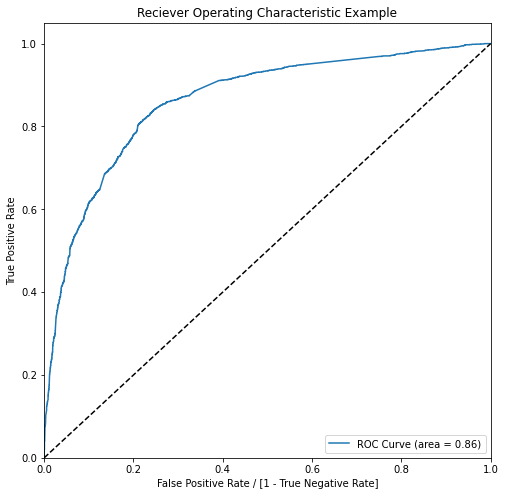

In [106]:
# Calling the function, plotting the ROC curve.

draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Probability'] )

The Area Under Curve is 0.86. 

#### Finding the Optimal Cutoff

In [107]:
# Creating  columns with different probability cutoffs.

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Probability'].map(lambda x: 1 if x>i else 0)
y_train_pred_final

,Lead Number,Converted,Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,638862,0,0.031979,0,1,0,0,0,0,0,0,0,0,0
1,631647,1,0.871562,1,1,1,1,1,1,1,1,1,1,0
2,580548,0,0.973464,1,1,1,1,1,1,1,1,1,1,1
3,589007,0,0.041825,0,1,0,0,0,0,0,0,0,0,0
4,589437,0,0.237617,0,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6444,656682,0,0.112406,0,1,1,0,0,0,0,0,0,0,0
6445,659710,1,0.954889,1,1,1,1,1,1,1,1,1,1,1
6446,588075,1,0.983056,1,1,1,1,1,1,1,1,1,1,1
6447,596284,0,0.158246,0,1,1,0,0,0,0,0,0,0,0


In [108]:
# Calculating accuracy, sensitivity and specificity for various cutoffs.

cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sens', 'spec'])

num = [float(x)/10 for x in range(10)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i])
    total = sum(sum(cm1))
    
    accuracy = (cm1[0, 0] + cm1[1, 1])/total
    sens = cm1[1, 1]/(cm1[1, 0] + cm1[1, 1])
    spec = cm1[0, 0]/(cm1[0, 0] + cm1[0, 1])
    cutoff_df.loc[i] = [i, accuracy, sens, spec]

print(cutoff_df)

     prob  accuracy      sens      spec
0.0   0.0  0.392309  1.000000  0.000000
0.1   0.1  0.510932  0.973913  0.212044
0.2   0.2  0.721352  0.912253  0.598112
0.3   0.3  0.788184  0.839921  0.754784
0.4   0.4  0.791285  0.763241  0.809390
0.5   0.5  0.793146  0.690119  0.859658
0.6   0.6  0.780121  0.569565  0.916050
0.7   0.7  0.764615  0.483794  0.945905
0.8   0.8  0.736548  0.381818  0.965552
0.9   0.9  0.685533  0.220553  0.985711


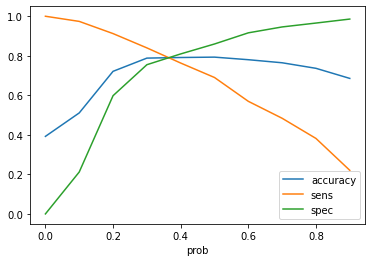

In [109]:
# Plotting accuracy, sensitivity and specificity for different probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy', 'sens', 'spec'])
plt.show()

It seems like the optimal cutoff is somewhere between 0.35-0.38. Let us compare the Accuracy, Sensitivity and Specificity at these cutoffs.

In [110]:
# Dropping all the cutoff columns.

y_train_pred_final = y_train_pred_final.drop(['Predicted', 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], axis=1)
y_train_pred_final.head()

,Lead Number,Converted,Probability
0,638862,0,0.031979
1,631647,1,0.871562
2,580548,0,0.973464
3,589007,0,0.041825
4,589437,0,0.237617


In [111]:
# More precise cutoffs.

y_train_pred_final['Pred_0.35'] = y_train_pred_final['Probability'].map(lambda x: 1 if x>=0.35 else 0)
y_train_pred_final['Pred_0.36'] = y_train_pred_final['Probability'].map(lambda x: 1 if x>=0.36 else 0)
y_train_pred_final['Pred_0.37'] = y_train_pred_final['Probability'].map(lambda x: 1 if x>=0.37 else 0)
y_train_pred_final['Pred_0.38'] = y_train_pred_final['Probability'].map(lambda x: 1 if x>=0.38 else 0)

y_train_pred_final.head()

,Lead Number,Converted,Probability,Pred_0.35,Pred_0.36,Pred_0.37,Pred_0.38
0,638862,0,0.031979,0,0,0,0
1,631647,1,0.871562,1,1,1,1
2,580548,0,0.973464,1,1,1,1
3,589007,0,0.041825,0,0,0,0
4,589437,0,0.237617,0,0,0,0


In [112]:
# Comparing the new cutoffs.

pred_cols = ['Pred_0.35', 'Pred_0.36', 'Pred_0.37', 'Pred_0.38']

for pred_col in pred_cols:
    conf_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[pred_col])
    TP = conf_matrix[1, 1]
    TN = conf_matrix[0, 0]
    FP = conf_matrix[0, 1]
    FN = conf_matrix[1, 0]
    accuracy = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final[pred_col])
    sens = TP/float(TP+FN)
    spec = TN/float(TN+FP)
    print(pred_col)
    print(f'Accuracy: {accuracy}\nSensitivity: {sens}\nSpecificity: {spec}')
    print('---'*10, end='\n\n')
    

Pred_0.35
Accuracy: 0.7942316638238487
Sensitivity: 0.8090909090909091
Specificity: 0.7846389385047206
------------------------------

Pred_0.36
Accuracy: 0.7948519150255854
Sensitivity: 0.8023715415019763
Specificity: 0.7899974483286553
------------------------------

Pred_0.37
Accuracy: 0.791905721817336
Sensitivity: 0.78300395256917
Specificity: 0.7976524623628477
------------------------------

Pred_0.38
Accuracy: 0.7915955962164677
Sensitivity: 0.7758893280632411
Specificity: 0.801735136514417
------------------------------



**0.35** seems to be the optimal cutoff with accuracy score of around 0.794, sensitivity score around 0.81 and specificity score around 0.785.

In [113]:
# Leaving only 0.35 as the optimal cutoff.

y_train_pred_final = y_train_pred_final.drop(pred_cols, axis=1)
y_train_pred_final['Predicted'] = y_train_pred_final['Probability'].map(lambda x: 1 if x>=0.35 else 0)
y_train_pred_final.head()

,Lead Number,Converted,Probability,Predicted
0,638862,0,0.031979,0
1,631647,1,0.871562,1
2,580548,0,0.973464,1
3,589007,0,0.041825,0
4,589437,0,0.237617,0


#### Making Predictions on the Test Set

In [114]:
# Rescaling the test set continuous variables.

X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Organic Search,LeadSource_Other,LeadSource_Reference,Specialization_Finance Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Other,Specialization_Unknown,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,NotableActivity_Email Opened,NotableActivity_Modified,NotableActivity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,
633455,0.212811,1.425180,0.816574,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
608093,0.212811,1.709519,0.816574,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
600228,1.443957,-0.760791,0.164100,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
620304,0.520598,-0.407631,1.307156,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
608371,-1.018334,-0.885755,-1.145754,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1


In [115]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Google,LeadSource_Organic Search,LeadSource_Reference,Specialization_Unknown,NotableActivity_Email Opened,NotableActivity_SMS Sent
Lead Number,,,,,,,,,
633455,1.425180,0,0,1,0,0,0,0,1
608093,1.709519,0,0,0,1,0,1,1,0
600228,-0.760791,0,1,0,0,0,0,1,0
620304,-0.407631,0,1,0,0,0,0,1,0
608371,-0.885755,0,0,0,0,0,1,0,1


In [116]:
# Adding a constant.

X_test_sm = sm.add_constant(X_test)

# Making predictions.

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

Lead Number
633455    0.908401
608093    0.597683
600228    0.122603
620304    0.171203
608371    0.507106
633922    0.976663
637771    0.891753
634036    0.913943
629507    0.628365
587225    0.543735
dtype: float64

In [117]:
# Converting y_test_pred into a dataframe.

y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
Lead Number,
633455,0.908401
608093,0.597683
600228,0.122603
620304,0.171203
608371,0.507106


In [118]:
# Converting y_test into a dataframe.

y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
Lead Number,
633455,1
608093,0
600228,0
620304,1
608371,1


In [119]:
# Merging y_test_df and y_pred.

y_pred_final = pd.concat([y_test_df, y_pred], axis=1)
y_pred_final.rename({0: 'Probability'}, axis=1, inplace=True)
y_pred_final.head()

,Converted,Probability
Lead Number,,
633455,1,0.908401
608093,0,0.597683
600228,0,0.122603
620304,1,0.171203
608371,1,0.507106


In [120]:
# Applying the cutoff and making predictions.

y_pred_final['Predicted'] = y_pred_final['Probability'].map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Probability,Predicted
Lead Number,,,
633455,1,0.908401,1
608093,0,0.597683,1
600228,0,0.122603,0
620304,1,0.171203,0
608371,1,0.507106,1


In [121]:
# Checking the accuracy.

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['Predicted'])

0.7833634719710669

In [122]:
# Creating a confusion matrix for the test set.

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['Predicted'])
confusion2

array([[1336,  405],
       [ 194,  830]])

In [123]:
# Assigning True and False negatives and positives.

TN = confusion2[0, 0]
FP = confusion2[0, 1]
FN = confusion2[1, 0]
TP = confusion2[1, 1]

In [124]:
# Calculating the sensitivity.

TP/float(TP+FN)

0.810546875

In [125]:
# Calcualting Specificity.

TN/float(TN+FP)

0.7673750717978174

As we can see, the model is doing pretty well on the test set, with accuracy of ~78.3%, sensitivity of ~81% and specificity ~76.7%.

## 6. Assigning the Score to the Leads.

In [126]:
# Setting 'Lead_Number' column as the index for the y_train_

y_train_pred_final = y_train_pred_final.set_index('Lead Number')
y_train_pred_final

,Converted,Probability,Predicted
Lead Number,,,
638862,0,0.031979,0
631647,1,0.871562,1
580548,0,0.973464,1
589007,0,0.041825,0
589437,0,0.237617,0
...,...,...,...
656682,0,0.112406,0
659710,1,0.954889,1
588075,1,0.983056,1


In [127]:
# Concatinating the train and test predicted dataframes.

leads_score = pd.concat([y_train_pred_final, y_pred_final], axis=0)
leads_score = leads_score[['Probability', 'Predicted', 'Converted']]
leads_score.rename({'Probability': 'Lead Score'}, axis=1, inplace=True)
leads_score['Lead Score'] = leads_score['Lead Score'].apply(lambda x: round(x*100, 2))
leads_score

,Lead Score,Predicted,Converted
Lead Number,,,
638862,3.20,0,0
631647,87.16,1,1
580548,97.35,1,0
589007,4.18,0,0
589437,23.76,0,0
...,...,...,...
648999,76.12,1,1
583427,11.24,0,0
594464,50.71,1,0


## 7. Takeaways

#### The most important variables for identifying the hot leads are:

1. Total Time Spent on Website.
2. LeadOrigin_Lead Add Form.
3. LeadSource_Direct Traffic.
4. LeadSource_Google.
5. LeadSource_Organic Search.
6. LeadSource_Reference.
7. Specialization_Unknown.
8. NotableActivity_Email Opened.
9. NotableActivity_SMS Sent.